## Customer Segmentation using RFM

## Data


In [1]:
##packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import timedelta
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import sys
import warnings



In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
retail_data=pd.read_excel('../Data/Online Retail.xlsx',sheet_name=0,dtype={'InvoiceNo':str,'CustomerID':str})
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### EDA

In [4]:
retail_data.shape

(541909, 8)

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
## find duplicate records
print(retail_data.shape)
df_dup=pd.DataFrame()
df_dup['Dup']=retail_data.duplicated()
print(df_dup.loc[df_dup['Dup']==True])
retail_data.drop_duplicates(inplace=True)
print(retail_data.shape)

(541909, 8)
         Dup
517     True
527     True
537     True
539     True
555     True
587     True
589     True
594     True
598     True
600     True
601     True
604     True
605     True
616     True
617     True
618     True
620     True
758     True
831     True
835     True
852     True
859     True
891     True
1061    True
1067    True
1140    True
1153    True
1159    True
1165    True
1166    True
...      ...
537817  True
537819  True
537824  True
538294  True
538376  True
538466  True
538494  True
538626  True
538677  True
538751  True
538756  True
538762  True
538771  True
538776  True
538781  True
538785  True
538942  True
538955  True
538970  True
539892  True
539926  True
540032  True
540198  True
541611  True
541655  True
541675  True
541689  True
541692  True
541699  True
541701  True

[5268 rows x 1 columns]
(536641, 8)


In [21]:
# retail_data.reset_index(inplace=True)

In [7]:
##null valus
# inds = pd.isna(retail_data).any(1).to_numpy().nonzero()[0]
# print(inds)
# pd.isna(retail_data).any(1).sum() #135037
pd.isna(retail_data).sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
####remove all null values in CustomerID col
retail_data.dropna(subset=['CustomerID'],how='all',inplace=True)
retail_data.shape

(401604, 8)

In [9]:
retail_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [10]:
retail_data.reset_index(inplace=True)

In [11]:
retail_data.drop(['index'],axis=1,inplace=True)

In [12]:
retail_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [13]:
retail_data.shape

(401604, 8)

In [14]:
retail_data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604,401604,401604,401604.000000,401604,401604.000000,401604,401604
unique,22190,3684,3896,NaN,20460,NaN,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,17841,United Kingdom
freq,542,2065,2058,NaN,543,NaN,7812,356728
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.183273,NaN,3.474064,NaN,NaN
std,NaN,NaN,NaN,250.283037,NaN,69.764035,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,NaN,NaN


In [15]:
retail_data.shape

(401604, 8)

In [37]:
sd=retail_data.groupby(['Country'])['InvoiceNo'].nunique().reset_index()
sd

,Country,InvoiceNo
0,Australia,69
1,Austria,19
2,Bahrain,2
3,Belgium,119
4,Brazil,1
5,Canada,6
6,Channel Islands,33
7,Cyprus,20
8,Czech Republic,5
9,Denmark,21


In [25]:
# sd.pivot(index='Country',values='InvoiceNo',columns='Country').plot(kind='bar',stacked=True,figsize=(8,8))

KeyError: 'CustomerID'

In [32]:
pd=retail_data.groupby(['Country','CustomerID'])['InvoiceNo'].nunique().reset_index()


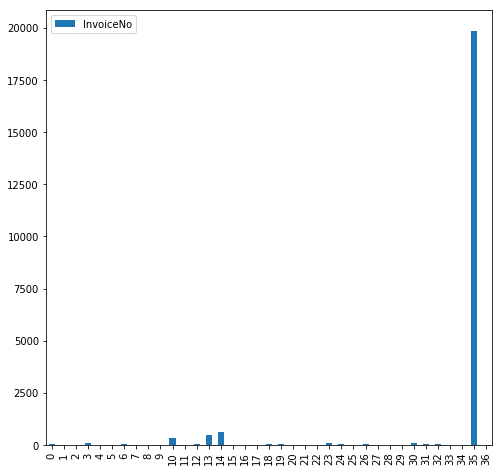

In [39]:
retail_data.groupby(['Country'])['InvoiceNo'].nunique().reset_index().plot(kind='bar',stacked=True,figsize=(8,8))

In [19]:
####most frequent country UK ....cluster of only UK country
retail_UK=retail_data[retail_data['Country']=='United Kingdom']
retail_UK.shape

(356728, 8)

In [20]:
retail_UK.loc[retail_UK['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
915,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom


In [21]:
##Quantity col :-ve values : cancelled orders
print(retail_UK.loc[retail_UK['Quantity']<0].count())#8872
print(retail_UK.shape)
#removed cancelled orders
retail_UK.drop(retail_UK[retail_UK['Quantity']<0].index,inplace=True)
print(retail_UK.shape)

InvoiceNo      7501
StockCode      7501
Description    7501
Quantity       7501
InvoiceDate    7501
UnitPrice      7501
CustomerID     7501
Country        7501
dtype: int64
(356728, 8)
(349227, 8)


c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
####focusing on data from 9-12-2010 to 9-12-2011 
retail_UK = retail_UK[retail_UK['InvoiceDate']>= "2010-12-09"]

In [23]:
retail_UK.shape

(337670, 8)

In [24]:
retail_UK['Total Price']=retail_UK['UnitPrice']* retail_UK['Quantity']

In [25]:
retail_UK.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
12671,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243,United Kingdom,47.4
12672,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243,United Kingdom,37.2
12673,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243,United Kingdom,15.3
12674,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243,United Kingdom,31.8
12675,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243,United Kingdom,15.9


In [26]:
print("##Data Summary..")
#exploring the unique values of each attribute
print("Number of transactions:", retail_UK['InvoiceNo'].nunique())
print("Number of products bought:",retail_UK['StockCode'].nunique())
print("Number of customers:", retail_UK['CustomerID'].nunique() )

##Data Summary..
Number of transactions: 16017
Number of products bought: 3611
Number of customers: 3863


In [87]:
## How many transactions per product?
print(retail_UK.groupby(['StockCode'])['InvoiceNo'].count())

StockCode
10002            31
10080            21
10120            25
10125            46
10133           110
10135           111
11001            52
15030            13
15034            83
15036           296
15039            65
16008            59
16010             2
16011            40
16012            31
16014            40
16015            24
16016            46
16033             4
16043             2
16045            57
16046            13
16048            37
16049             5
16052             4
16054            29
16216            40
16218            45
16219            41
16225            72
               ... 
90214A           14
90214B            1
90214C            8
90214D            7
90214E            8
90214F            2
90214G            7
90214H            6
90214I            3
90214J            4
90214K           11
90214L            5
90214M            4
90214N            5
90214O            1
90214P            6
90214R            4
90214S            4
90214T    

Description
WHITE HANGING HEART T-LIGHT HOLDER    1837
Name: InvoiceNo, dtype: int64

In [88]:
## Which product purchased more
retail_UK.groupby(['Description'])['InvoiceNo'].count().sort_values().tail(1) #StockCode85123A    1844

Description
WHITE HANGING HEART T-LIGHT HOLDER    1837
Name: InvoiceNo, dtype: int64

In [124]:
retail_data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

### RFM analysis

#### Recency

In [113]:
#recent date considered as the next day of the last invoice date
recent_date=retail_UK['InvoiceDate'].max()+ timedelta(days=1)

In [119]:
#recent purchase by each customer
retail_UK.groupby(['CustomerID'])['InvoiceDate'].max()

CustomerID
12346   2011-01-18 10:01:00
12747   2011-12-07 14:34:00
12748   2011-12-09 12:20:00
12749   2011-12-06 09:56:00
12820   2011-12-06 15:12:00
12821   2011-05-09 15:51:00
12822   2011-09-30 10:04:00
12823   2011-09-26 07:35:00
12824   2011-10-11 12:49:00
12826   2011-12-07 10:25:00
12827   2011-12-04 12:17:00
12828   2011-12-07 08:45:00
12829   2011-01-07 11:13:00
12830   2011-11-02 11:54:00
12831   2011-03-22 13:02:00
12832   2011-11-07 13:30:00
12833   2011-07-17 13:46:00
12834   2011-03-02 09:49:00
12836   2011-10-11 15:10:00
12837   2011-06-19 16:07:00
12838   2011-11-06 12:20:00
12839   2011-12-07 12:33:00
12840   2011-07-19 09:29:00
12841   2011-12-05 11:13:00
12842   2011-09-30 15:33:00
12843   2011-10-05 12:09:00
12844   2011-11-10 13:31:00
12845   2011-03-17 13:34:00
12847   2011-11-17 13:16:00
12849   2011-11-08 13:41:00
                ...        
18241   2011-11-30 12:10:00
18242   2011-09-28 13:43:00
18245   2011-12-02 14:48:00
18246   2011-11-16 11:49:00
18248   2

In [30]:
##no. of days -recent date - last purchase 
# retail_UK.groupby(['CustomerID'])['InvoiceDate'].apply(lambda x : (recent_date - x.max()).days)
res_recency=retail_UK.groupby(['CustomerID'],as_index=False)['InvoiceDate'].agg({'Days':lambda x : (recent_date - x.max()).days})
res_recency

,CustomerID,Days
0,12346,326
1,12747,2
2,12748,1
3,12749,4
4,12820,3
5,12821,214
6,12822,71
7,12823,75
8,12824,60
9,12826,3


#### Frequency

In [31]:
retail_UK.groupby(['CustomerID','InvoiceDate'])['InvoiceNo'].agg({'Counts': pd.Series.count})

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Counts
CustomerID InvoiceDate                
12346      2011-01-18 10:01:00       1
12747      2010-12-13 10:41:00       8
           2011-01-20 14:01:00       5
           2011-03-01 14:53:00      12
           2011-05-05 15:31:00       9
           2011-05-25 09:57:00      14
           2011-06-28 10:06:00       8
           2011-08-22 10:38:00       7
           2011-10-04 08:26:00      15
           2011-11-17 17:13:00      11
           2011-12-07 14:34:00       7
12748      2010-12-09 11:44:00       2
           2010-12-09 13:21:00       5
           2010-12-09 13:22:00       1
           2010-12-10 11:24:00      60
           2010-12-10 11:33:00      54
           2010-12-10 11:42:00      41
           2010-12-10 12:50:00      11
           2010-12-10 12:56:00       4
           2010-12-10 12:58:00       1
           2010-12-13 16:01:00       1
           2010-12-13 16:18:00       1
           2010-12-14 13:09:00      22
           2010-12-16 09:35:00       3
           2010-12-16 11:51:00      30
           2010-12-16 12:42:00       2
           2010-12-17 10:12:00      10
           2010-12-17 17:17:00      28
           2010-12-21 16:06:00      16
           2010-12-23 11:09:00       5
...                                ...
18273      2011-03-27 11:22:00       1
           2011-09-05 11:27:00       1
           2011-12-07 13:16:00       1
18274      2011-11-09 17:03:00      11
18276      2011-10-27 10:54:00      14
18277      2011-10-12 15:22:00       8
18278      2011-09-27 11:58:00       9
18280      2011-03-07 09:52:00      10
18281      2011-06-12 10:53:00       7
18282      2011-08-05 13:35:00       7
           2011-12-02 11:43:00       5
18283      2011-01-06 14:14:00      57
           2011-01-23 14:58:00      44
           2011-02-28 10:30:00      29
           2011-04-21 16:37:00      55
           2011-05-23 11:33:00      37
           2011-06-14 11:41:00      24
           2011-06-23 19:20:00      76
           2011-07-14 13:00:00      54
           2011-07-14 13:20:00       1
           2011-09-05 12:35:00      47
           2011-10-27 14:38:00      38
           2011-11-10 14:59:00      56
           2011-11-10 15:07:00       1
           2011-11-23 13:27:00     102
           2011-11-30 12:59:00      50
           2011-12-06 12:02:00      50
18287      2011-05-22 10:39:00      29
           2011-10-12 10:23:00      38
           2011-10-28 09:29:00       3

[15936 rows x 1 columns]

In [32]:
# retail_UK.groupby(['CustomerID','InvoiceDate'])['InvoiceNo'].count()
# retail_UK.groupby(['CustomerID','InvoiceDate'])['InvoiceNo'].nunique()
res=retail_UK.groupby(['CustomerID','InvoiceDate'],as_index=False)['InvoiceNo'].agg({'Counts': pd.Series.nunique})
res_freq=res.groupby(['CustomerID'],as_index=False)['Counts'].sum()
res_freq

,CustomerID,Counts
0,12346,1
1,12747,10
2,12748,197
3,12749,5
4,12820,4
5,12821,1
6,12822,2
7,12823,5
8,12824,1
9,12826,7


#### Monetary

In [33]:
## how much money did customer spend? ##monetary
res_monetary=retail_UK.groupby(['CustomerID'],as_index=False)['Total Price'].sum()
res_monetary

,CustomerID,Total Price
0,12346,77183.60
1,12747,3837.45
2,12748,31217.94
3,12749,4090.88
4,12820,942.34
5,12821,92.72
6,12822,948.88
7,12823,1759.50
8,12824,397.12
9,12826,1474.72


#### RFM TABLE

In [34]:
res_rfm=res_recency.merge(res_freq,on='CustomerID').merge(res_monetary,on='CustomerID')
res_rfm.columns=['CustomerID','Recency','Frequency','Monetary']
res_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,2,10,3837.45
2,12748,1,197,31217.94
3,12749,4,5,4090.88
4,12820,3,4,942.34
5,12821,214,1,92.72
6,12822,71,2,948.88
7,12823,75,5,1759.50
8,12824,60,1,397.12
9,12826,3,7,1474.72


In [121]:
################################verification
retail_UK.loc[retail_UK['CustomerID']=='18287']    

####visited 3 times 
####43 days gap from the recent visit
#### total purchase amt 1837

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
139049,554065,22755,SMALL PURPLE BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,0.85,18287,United Kingdom,10.20
139050,554065,22754,SMALL RED BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,0.85,18287,United Kingdom,10.20
139051,554065,22753,SMALL YELLOW BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,0.85,18287,United Kingdom,10.20
139052,554065,22756,LARGE YELLOW BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,1.25,18287,United Kingdom,15.00
139053,554065,22758,LARGE PURPLE BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,1.25,18287,United Kingdom,15.00
139054,554065,22757,LARGE RED BABUSHKA NOTEBOOK,12,2011-05-22 10:39:00,1.25,18287,United Kingdom,15.00
139055,554065,22752,SET 7 BABUSHKA NESTING BOXES,4,2011-05-22 10:39:00,8.50,18287,United Kingdom,34.00
139056,554065,22583,PACK OF 6 HANDBAG GIFT BOXES,6,2011-05-22 10:39:00,2.55,18287,United Kingdom,15.30
139057,554065,22582,PACK OF 6 SWEETIE GIFT BOXES,6,2011-05-22 10:39:00,2.55,18287,United Kingdom,15.30
139058,554065,84584,PINK GINGHAM CAT WITH SCARF,6,2011-05-22 10:39:00,2.55,18287,United Kingdom,15.30


#### RFM Score

In [36]:
### Quantiles
rfm_quantiles=res_rfm.quantile([0.25,0.5,0.75])
# rfm_quantiles.columns=['index','Rec_val','Freq_val','Mon_val']

In [37]:
rfm_quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,293.05
0.50,50.0,2.0,639.02
0.75,134.0,5.0,1548.75


In [38]:
rfm_quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 134.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 293.05, 0.5: 639.0199999999998, 0.75: 1548.7500000000005}}

In [39]:
####high R score -recently purchased- best customer 
def RScore(val,rec,quant):
    if val <= quant[rec][0.25]:
        return 4
    elif val <= quant[rec][0.50]:
        return 3
    elif val <= quant[rec][0.75]: 
        return 2
    else:
        return 1

In [40]:
####high FM score -frequent vistors and spends lot of money- best customer 
def FMScore(val,fm,quant):
    if val <= quant[fm][0.25]:
        return 1
    elif val <= quant[fm][0.50]:
        return 2
    elif val <= quant[fm][0.75]: 
        return 3
    else:
        return 4

In [41]:
rfm_segmentTable=res_rfm

In [42]:
rfm_segmentTable['R Score']=rfm_segmentTable['Recency'].apply(RScore,args=('Recency',rfm_quantiles))

In [43]:
rfm_segmentTable['F Score']=rfm_segmentTable['Frequency'].apply(FMScore,args=('Frequency',rfm_quantiles))

In [44]:
rfm_segmentTable['M Score']=rfm_segmentTable['Monetary'].apply(FMScore,args=('Monetary',rfm_quantiles))

In [45]:
rfm_segmentTable['RFM Score']=rfm_segmentTable['R Score'].apply(lambda x: str(x))+rfm_segmentTable['F Score'].apply(lambda x: str(x))+rfm_segmentTable['M Score'].apply(lambda x: str(x))

#### SEGMENTED TABLE

In [46]:
######FINAL RFM SEGMENTATION TABLE 
rfm_segmentTable

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score
0,12346,326,1,77183.60,1,1,4,114
1,12747,2,10,3837.45,4,4,4,444
2,12748,1,197,31217.94,4,4,4,444
3,12749,4,5,4090.88,4,3,4,434
4,12820,3,4,942.34,4,3,3,433
5,12821,214,1,92.72,1,1,1,111
6,12822,71,2,948.88,2,2,3,223
7,12823,75,5,1759.50,2,3,4,234
8,12824,60,1,397.12,2,1,2,212
9,12826,3,7,1474.72,4,4,3,443


In [47]:
####Best Customers - rfm score : 444
rfm_segmentTable.loc[rfm_segmentTable['RFM Score']=='444']

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score
1,12747,2,10,3837.45,4,4,4,444
2,12748,1,197,31217.94,4,4,4,444
21,12839,3,13,5188.81,4,4,4,444
23,12841,5,23,3485.59,4,4,4,444
34,12856,8,6,2170.78,4,4,4,444
59,12901,9,28,17654.54,4,4,4,444
73,12921,9,35,15899.29,4,4,4,444
83,12935,2,7,2160.70,4,4,4,444
93,12948,16,7,2064.95,4,4,4,444
99,12955,1,11,4757.16,4,4,4,444


#### SEGMENTED RESULTS

In [48]:
#################SEGMENTED RESULTS

In [49]:
print("Best Customers: ",len(rfm_segmentTable[rfm_segmentTable['RFM Score']=='444']))
print('Frequently visiting Customers: ',len(rfm_segmentTable[rfm_segmentTable['F Score']==4]))
print("Most Spending Customers: ",len(rfm_segmentTable[rfm_segmentTable['M Score']==4]))
print('Almost Lost: ', len(rfm_segmentTable[rfm_segmentTable['RFM Score']=='244']))
print('Lost Customers: ',len(rfm_segmentTable[rfm_segmentTable['R Score']==1]))
print('Lost Cheap Customers: ',len(rfm_segmentTable[rfm_segmentTable['RFM Score']=='111']))
print('Lost Expensive Customers: ',len(rfm_segmentTable[rfm_segmentTable['RFM Score']=='114']))

Best Customers:  399
Frequently visiting Customers:  752
Most Spending Customers:  966
Almost Lost:  60
Lost Customers:  961
Lost Cheap Customers:  390
Lost Expensive Customers:  7


In [ ]:
### KMEans clustering to visualize segmented results

In [53]:
rfmScores=res_rfm[['CustomerID','R Score','F Score','M Score']]


,R Score,F Score,M Score
CustomerID,,,
12346,1,1,4
12747,4,4,4
12748,4,4,4
12749,4,3,4
12820,4,3,3
12821,1,1,1
12822,2,2,3
12823,2,3,4
12824,2,1,2


In [60]:
rfmScores.set_index('CustomerID',inplace=True)

In [61]:
rfmScores

,R Score,F Score,M Score
CustomerID,,,
12346,1,1,4
12747,4,4,4
12748,4,4,4
12749,4,3,4
12820,4,3,3
12821,1,1,1
12822,2,2,3
12823,2,3,4
12824,2,1,2


In [62]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(rfmScores)
    wcss.append(kmeans.inertia_)


[14687.590991457417,
 6485.067876128737,
 4876.2101570064915,
 3601.2690891871907,
 2994.358442241347,
 2598.6105018853186,
 2330.6288524391157,
 2173.5468829780293,
 1958.425910913935,
 1760.7717471951398]

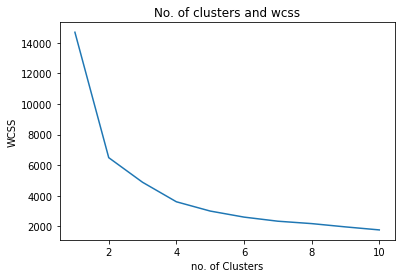

In [63]:
plt.plot(range(1,11),wcss)
plt.xlabel('no. of Clusters')
plt.ylabel('WCSS')
plt.title('No. of clusters and wcss')
plt.show()

In [64]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(rfmScores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [65]:
new_clusters=kmeans.predict(rfmScores)
new_clusters

array([0, 3, 3, ..., 2, 3, 3])

In [66]:
res_rfm['Cluster']=new_clusters

In [68]:
res_rfm[['CustomerID','Cluster']].sort_values('Cluster')

,CustomerID,Cluster
0,12346,0
1544,15038,0
1543,15036,0
1539,15032,0
3076,17169,0
1535,15027,0
1534,15026,0
1516,15002,0
1513,14997,0
1506,14978,0


In [69]:
res_rfm.groupby(['Cluster'])['CustomerID'].count()

Cluster
0     975
1    1260
2     651
3     977
Name: CustomerID, dtype: int64

In [71]:
res_rfm

,CustomerID,Recency,Frequency,Monetary,R Score,F Score,M Score,RFM Score,Cluster
0,12346,326,1,77183.60,1,1,4,114,0
1,12747,2,10,3837.45,4,4,4,444,3
2,12748,1,197,31217.94,4,4,4,444,3
3,12749,4,5,4090.88,4,3,4,434,3
4,12820,3,4,942.34,4,3,3,433,3
5,12821,214,1,92.72,1,1,1,111,1
6,12822,71,2,948.88,2,2,3,223,0
7,12823,75,5,1759.50,2,3,4,234,0
8,12824,60,1,397.12,2,1,2,212,1
9,12826,3,7,1474.72,4,4,3,443,3


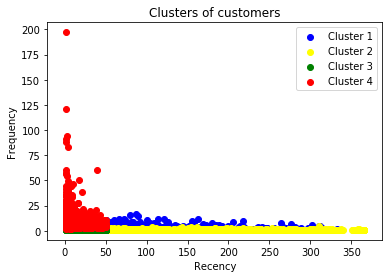

In [80]:
### R F Clusters
c1 = res_rfm[res_rfm.Cluster == 0]
c2 = res_rfm[res_rfm.Cluster == 1]
c3 = res_rfm[res_rfm.Cluster == 2]
c4 = res_rfm[res_rfm.Cluster == 3]

plt.scatter(c1.Recency, c1.Frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Recency, c4.Frequency, c = 'red', label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

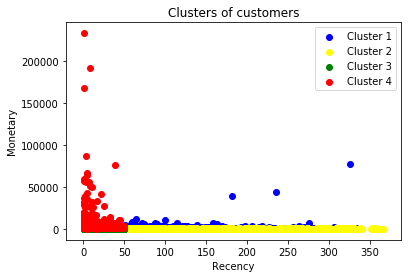

In [82]:
#### R M Clusters
c1 = res_rfm[res_rfm.Cluster == 0]
c2 = res_rfm[res_rfm.Cluster == 1]
c3 = res_rfm[res_rfm.Cluster == 2]
c4 = res_rfm[res_rfm.Cluster == 3]

plt.scatter(c1.Recency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Recency, c2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Recency, c3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Recency, c4.Monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

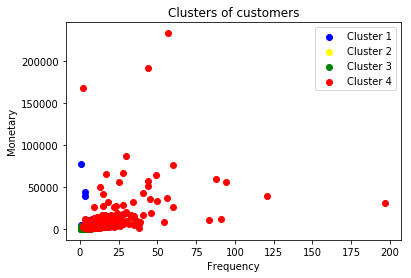

In [83]:
#### F M Clusters
c1 = res_rfm[res_rfm.Cluster == 0]
c2 = res_rfm[res_rfm.Cluster == 1]
c3 = res_rfm[res_rfm.Cluster == 2]
c4 = res_rfm[res_rfm.Cluster == 3]

plt.scatter(c1.Frequency, c1.Monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.Frequency, c2.Monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.Frequency, c3.Monetary, c = 'green', label = 'Cluster 3')
plt.scatter(c4.Frequency, c4.Monetary, c = 'red', label = 'Cluster 4')

plt.title('Clusters of customers')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()

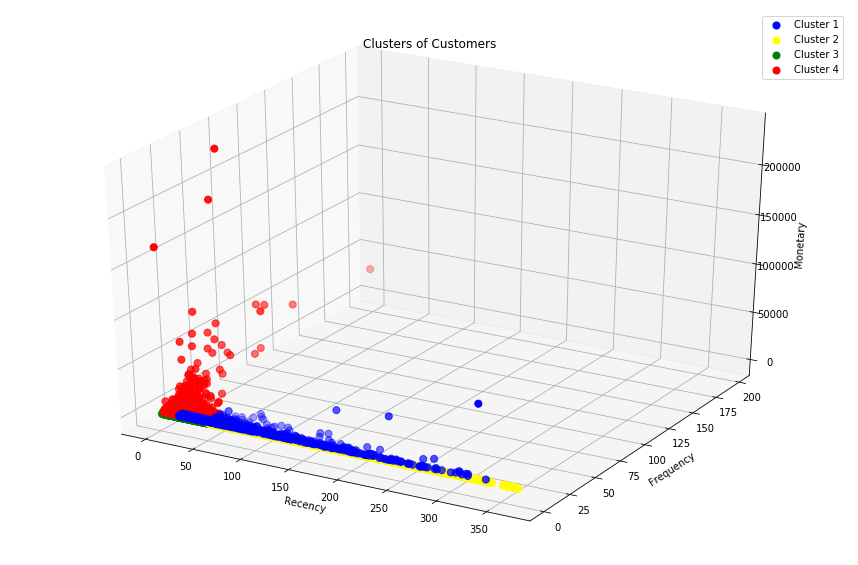

In [76]:
####R F M clusters
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(res_rfm[res_rfm.Cluster == i].Recency, 
               res_rfm[res_rfm.Cluster == i].Frequency, 
               res_rfm[res_rfm.Cluster == i].Monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of Customers')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()